# Exploratory Data Analysis on Netflix Data
#### By Vedant Thakur

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import re

In [2]:
df = pd.read_csv('netflix_data.csv')

In [3]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [4]:
df.shape

(8790, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [6]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [7]:
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


Visulaisation

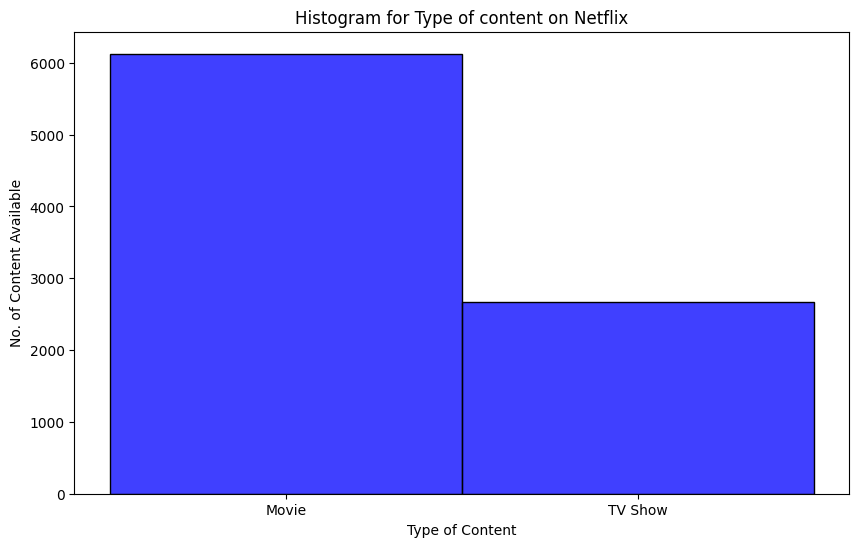

In [9]:
plt.figure(figsize=(10,6))
plt.title("Histogram for Type of content on Netflix")
sns.histplot(x='type', data=df, color='blue')
plt.xlabel('Type of Content')
plt.ylabel('No. of Content Available')
plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [27]:
print('Top 20 Countries in terms of Content on Netflix')
top_countries= df['country'].value_counts().head(20)
print(top_countries)

Top 20 Countries in terms of Content on Netflix
country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
Canada             271
Japan              259
South Korea        214
France             213
Spain              182
Mexico             138
Egypt              123
Australia          114
Turkey             112
Nigeria            105
Germany            104
China              100
Brazil              88
Taiwan              86
Indonesia           86
Name: count, dtype: int64


C:\Users\Vedant\AppData\Local\Temp\ipykernel_20120\61672887.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


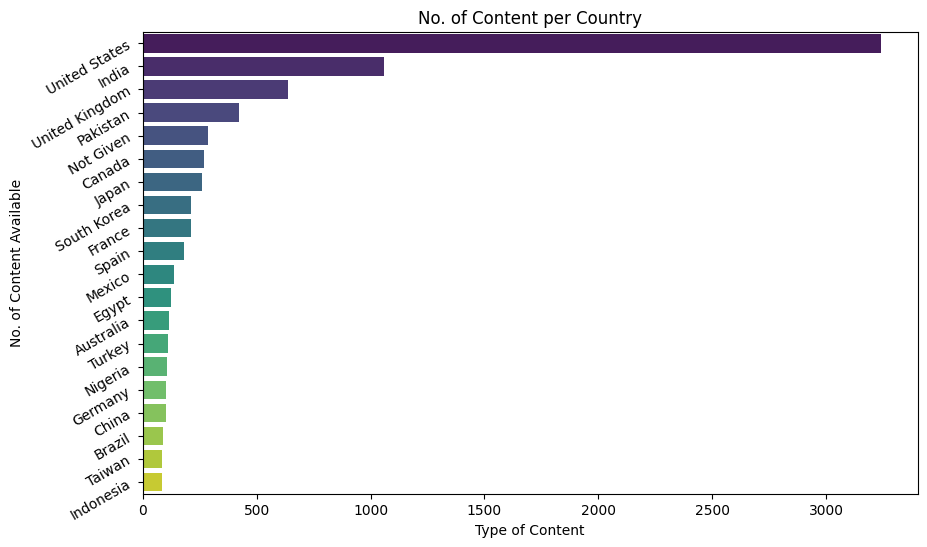

In [32]:
plt.figure(figsize=(10,6))
plt.title("No. of Content per Country")
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.yticks(rotation=30)
plt.xlabel('Type of Content')
plt.ylabel('No. of Content Available')
plt.show()

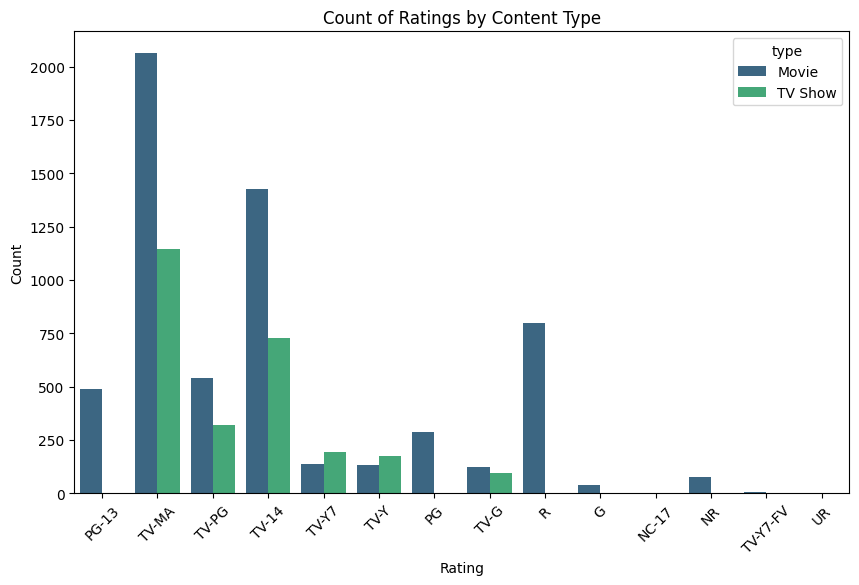

In [31]:
plt.figure(figsize=(10,6))
plt.title('Count of Ratings by Content Type')
sns.countplot(data=df, x='rating', hue='type', palette='viridis')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [33]:
df['listed_in'] = df['listed_in'].fillna('Unknown')
genres = df['listed_in'].str.split(',', expand=True).stack().value_counts().head(10)

C:\Users\Vedant\AppData\Local\Temp\ipykernel_20120\4120443973.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genres.values, y=genres.index, palette='plasma')


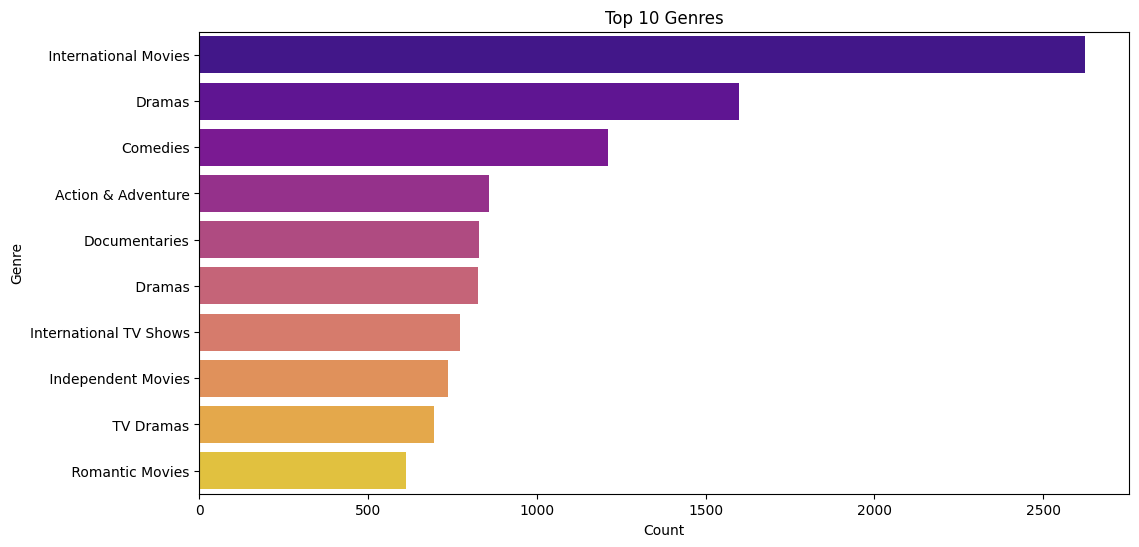

In [34]:
plt.figure(figsize=(12,6))
sns.barplot(x=genres.values, y=genres.index, palette='plasma')
plt.title('Top 10 Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

In [36]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

C:\Users\Vedant\AppData\Local\Temp\ipykernel_20120\1330160934.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year_added', data=df, order=sorted(df['year_added'].dropna().unique()), palette='crest')


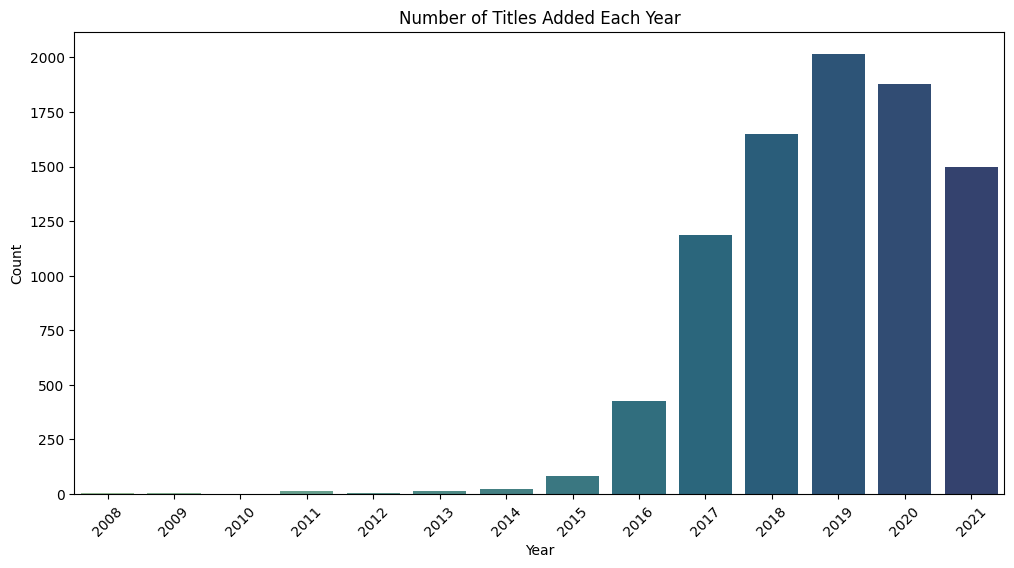

In [37]:
df['year_added'] = df['date_added'].dt.year

plt.figure(figsize=(12,6))
sns.countplot(x='year_added', data=df, order=sorted(df['year_added'].dropna().unique()), palette='crest')
plt.title('Number of Titles Added Each Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

C:\Users\Vedant\AppData\Local\Temp\ipykernel_20120\2246497879.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='month_added', data=df, palette='pastel')


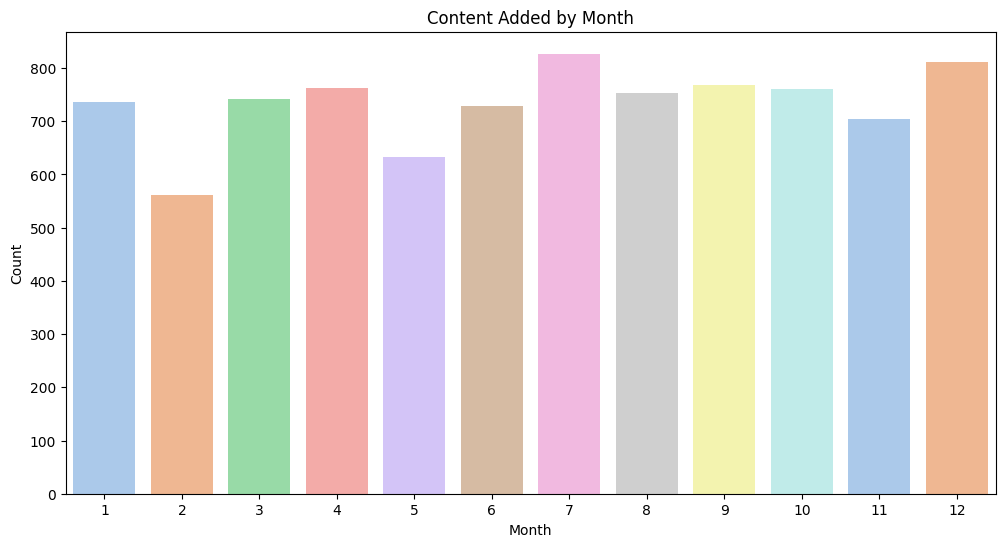

In [38]:
plt.figure(figsize=(12,6))
sns.countplot(x='month_added', data=df, palette='pastel')
plt.title('Content Added by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()